In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0154e648387eea4d54daea2618bdc9d1


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | ushuaia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | avarua
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | nome
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | rikitea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | cairns
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | mataura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | acapulco
----

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | serra talhada
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | faanui
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | yar-sale
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | taolanaro
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | hobyo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | baft
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | lasa
-----------------------------
Data Retrieval Complete      
--

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | port elizabeth
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | fairbanks
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | constitucion
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | codrington
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | dumas
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | clyde river
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | bethel
-----------------------------
Data Retrieval

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | westport
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | dolbeau
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | hedaru
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | atakpame
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | kardamaina
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | diamantino
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | belushya guba
City not found. Skipping...
---------------------

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 5 | qingquan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | kronach
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | san patricio
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | salalah
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | salme
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | gat
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | ancud
-----------------------------
Data Retrieval Complete      
---------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | palmer
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | camacha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | aldan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | tuktoyaktuk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | dhidhdhoo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | itarema
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | marsaxlokk
-----------------------------
Data Retrieval Complete      
------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | sorkjosen
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | vila
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | ouro preto do oeste
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | dinguiraye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | hervey bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | skagastrond
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 8 | cockburn town
-----------------------------
Data 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | socorro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | lolua
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | katesh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | lahad datu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | ambilobe
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 9 | shaunavon
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 9 | marystown
-----------------------------
Data Retrieval Complete    

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | kango
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | gwanda
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | taltal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | muzhi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | santa isabel do rio negro
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 11 | pisco
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 11 | tibiri
-----------------------------
Data Retrieval Complete      
--------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | axim
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | harper
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | saint-gaudens
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | buckeye
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 12 | sataua
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 12 | aswan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 12 | chiang klang
-----------------------------
Data Retrieval Comple

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,53.01,83,67,10.00,NZ,2021-01-20 17:52:34
1,Ushuaia,-54.8000,-68.3000,59.00,47,40,16.11,AR,2021-01-20 17:52:34
2,Avarua,-21.2078,-159.7750,80.60,83,20,6.91,CK,2021-01-20 17:52:35
3,Nome,64.5011,-165.4064,10.40,61,90,6.91,US,2021-01-20 17:52:35
4,Rikitea,-23.1203,-134.9692,78.10,75,25,15.17,PF,2021-01-20 17:52:36
5,Cairns,-16.9167,145.7667,75.20,94,75,8.05,AU,2021-01-20 17:48:14
6,Mataura,-46.1927,168.8643,53.01,83,82,10.00,NZ,2021-01-20 17:52:38
7,Acapulco,16.8634,-99.8901,86.00,58,20,4.61,MX,2021-01-20 17:51:28
8,Tura,25.5198,90.2201,57.87,92,1,3.76,IN,2021-01-20 17:50:04
9,Punta Arenas,-53.1500,-70.9167,59.00,44,0,5.75,CL,2021-01-20 17:50:06


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-01-20 17:52:34,-46.6000,168.3333,53.01,83,67,10.00
1,Ushuaia,AR,2021-01-20 17:52:34,-54.8000,-68.3000,59.00,47,40,16.11
2,Avarua,CK,2021-01-20 17:52:35,-21.2078,-159.7750,80.60,83,20,6.91
3,Nome,US,2021-01-20 17:52:35,64.5011,-165.4064,10.40,61,90,6.91
4,Rikitea,PF,2021-01-20 17:52:36,-23.1203,-134.9692,78.10,75,25,15.17
5,Cairns,AU,2021-01-20 17:48:14,-16.9167,145.7667,75.20,94,75,8.05
6,Mataura,NZ,2021-01-20 17:52:38,-46.1927,168.8643,53.01,83,82,10.00
7,Acapulco,MX,2021-01-20 17:51:28,16.8634,-99.8901,86.00,58,20,4.61
8,Tura,IN,2021-01-20 17:50:04,25.5198,90.2201,57.87,92,1,3.76
9,Punta Arenas,CL,2021-01-20 17:50:06,-53.1500,-70.9167,59.00,44,0,5.75


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

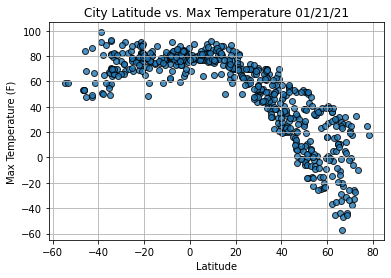

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

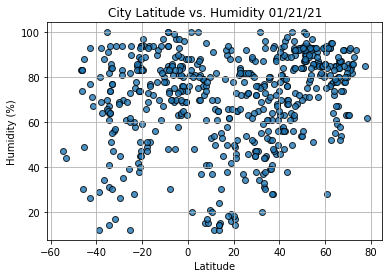

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

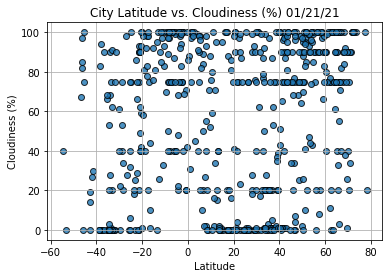

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

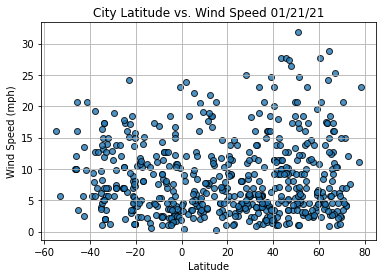

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
index13 = city_data_df.loc[13]
index13

City                       Dikson
Country                        RU
Date          2021-01-20 17:52:41
Lat                       73.5069
Lng                       80.5464
Max Temp                    -9.67
Humidity                       92
Cloudiness                    100
Wind Speed                   7.65
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
       ...  
558     True
559     True
560    False
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [32]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Nome,US,2021-01-20 17:52:35,64.5011,-165.4064,10.40,61,90,6.91
7,Acapulco,MX,2021-01-20 17:51:28,16.8634,-99.8901,86.00,58,20,4.61
8,Tura,IN,2021-01-20 17:50:04,25.5198,90.2201,57.87,92,1,3.76
10,Port Blair,IN,2021-01-20 17:52:39,11.6667,92.7500,77.47,66,71,7.45
12,Emba,KZ,2021-01-20 17:52:41,48.8264,58.1442,-1.53,93,98,3.42
...,...,...,...,...,...,...,...,...,...
557,Dingle,PH,2021-01-20 17:57:48,10.9995,122.6711,76.14,91,100,3.76
558,Liverpool,GB,2021-01-20 17:57:50,53.4106,-2.9779,41.00,93,90,9.22
559,Bara,NG,2021-01-20 17:57:50,10.3744,10.7288,76.98,20,0,7.76
561,Sinnamary,GF,2021-01-20 17:57:52,5.3833,-52.9500,81.72,70,96,9.80


In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Nome,US,2021-01-20 17:52:35,64.5011,-165.4064,10.40,61,90,6.91
7,Acapulco,MX,2021-01-20 17:51:28,16.8634,-99.8901,86.00,58,20,4.61
8,Tura,IN,2021-01-20 17:50:04,25.5198,90.2201,57.87,92,1,3.76
10,Port Blair,IN,2021-01-20 17:52:39,11.6667,92.7500,77.47,66,71,7.45
12,Emba,KZ,2021-01-20 17:52:41,48.8264,58.1442,-1.53,93,98,3.42


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

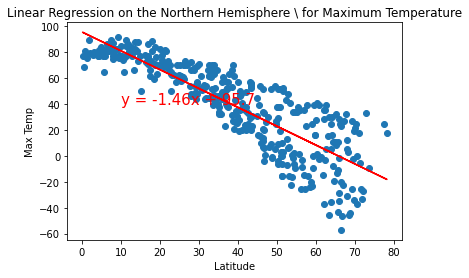

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title('Linear Regression on the Northern Hemisphere \ for Maximum Temperature')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

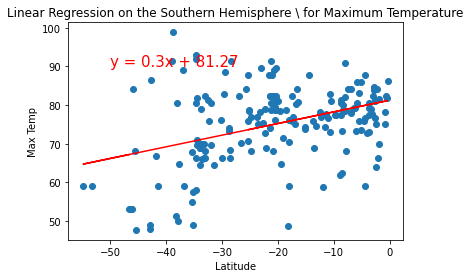

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title('Linear Regression on the Southern Hemisphere \ for Maximum Temperature')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

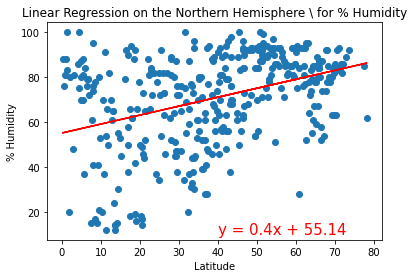

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title('Linear Regression on the Northern Hemisphere \ for % Humidity')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

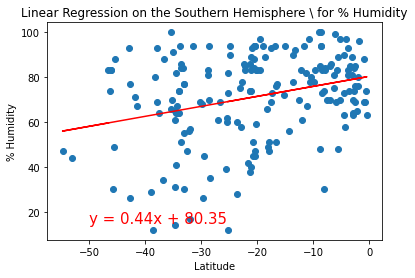

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title('Linear Regression on the Southern Hemisphere \ for % Humidity')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

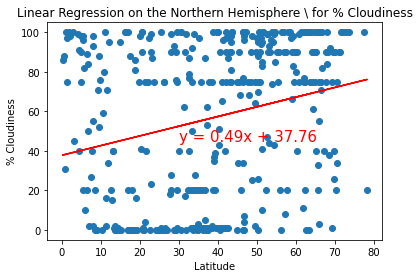

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title('Linear Regression on the Northern Hemisphere \ for % Cloudiness')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30, 45))

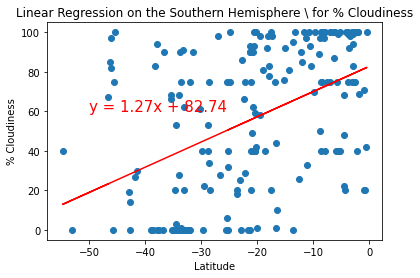

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title('Linear Regression on the Southern Hemisphere \ for % Cloudiness')
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

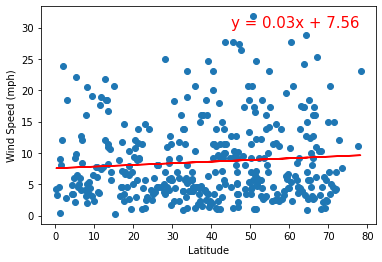

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(45, 30))

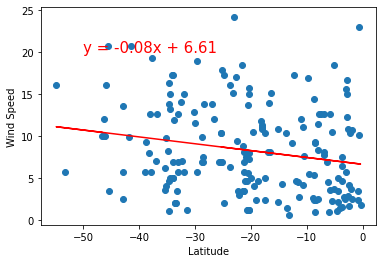

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))